# Heterojunction offsets

Heterojunctions are the basis of much of the semiconductor technology. From computer memory, to flat-panel display to photovoltaics, semiconductor heterojuctions underly much of the technology created in the past 100 years. Previosuly we constructed band-alignment-diagrams using the IP and EA from slab calculations. However, the details of the interface can also affect the line-up, from charge transfer and lattice strain effects, for example. For an excellent overview of the subject see: [Band engineering at interfaces: theory and numerical experiments](http://iopscience.iop.org/article/10.1088/0022-3727/31/11/002/meta).

## Our system 

For this demonstration we will choose a well-matched interface system: the interface between wurtzite structured ZnO and ZnS. 
In this case the lattice constants have been set to be those of ZnO. However, due to deformation potentials the value of the offset depends on the lattice parameter used.

**Note** The values in this tutorial are from very approximate calculations and no interface relaxation was allowed, therefore the absolute actual numbers should not be treated as meaningful.

![](./HJ.png)

## Procedure

We present two procedures for obtaining the offset from a heterojunction calulcation. 

(i) We will intitally calculate the offset for the interface as we have modelled it, this essentially involves the calculation of the macroscopic average of the potential.


(ii) We will then look at how the effects of strain at the interface can be accounted for to yield a "natural band offset", as outlined in [Appl. Phys. Lett. 94, 212109 (2009)](http://aip.scitation.org/doi/10.1063/1.3143626).

## Procedure (i)

We can calculate the offset $VBO$ with

$$VBO = \epsilon_{vbm}^a - \epsilon_{vbm}^b + \Delta V$$

where $\epsilon_{vbm}$ are the eigenvalues of the highest occupied bands from bulk calculations of the two materials (ZnO and ZnS) and $\Delta V$ is the offset in the potential across the interface.

We obtain the $\epsilon_{vbm}$ values from the bulk `OUTCAR` files as in the slab model exercise. 

In [13]:
import macrodensity as md

extrema_ZnO = md.get_band_extrema('OUTCAR_ZnO')
print("ZnO band edges:", extrema_ZnO)
extrema_ZnS = md.get_band_extrema('OUTCAR_ZnS')
print("ZnS band edges:", extrema_ZnS)

ZnO band edges: [1.0732, 1.6392]
ZnS band edges: [2.2761, 4.3586]


### Interface calculation

Now we do a calculation of the interface to get its potential profile. If using the `VASP` code, the potential file can be obtained by setting the `LVHAR` parameter in the `INCAR` file:

```
LVHAR = .TRUE.  # This generates a LOCPOT file with the potential 
```

which will generate a `LOCPOT` file similar to the `LOCPOT_slab` stored in the `Heterojunction` directory. In this tutorial, we will use the `LOCPOT.test` file to analyse the potential and extract the value of $\Delta V$.

In the sample `PlanarAverage.py` file, all we have to edit are the top three lines. Of these the only one that is not obvious is the `lattice_vector` parameter. This is just the periodicity of the slab in the direction normal to the surface. In the picture below, this is just the distance between the layers of ZnO.

![](./HJ.png)

In [14]:
%matplotlib inline
import os
import macrodensity as md
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

Reading header information...
Reading 3D data using Pandas...
Average of the potential =  6.488965743335063e-14
Average of the average =  6.496655065764874e-14


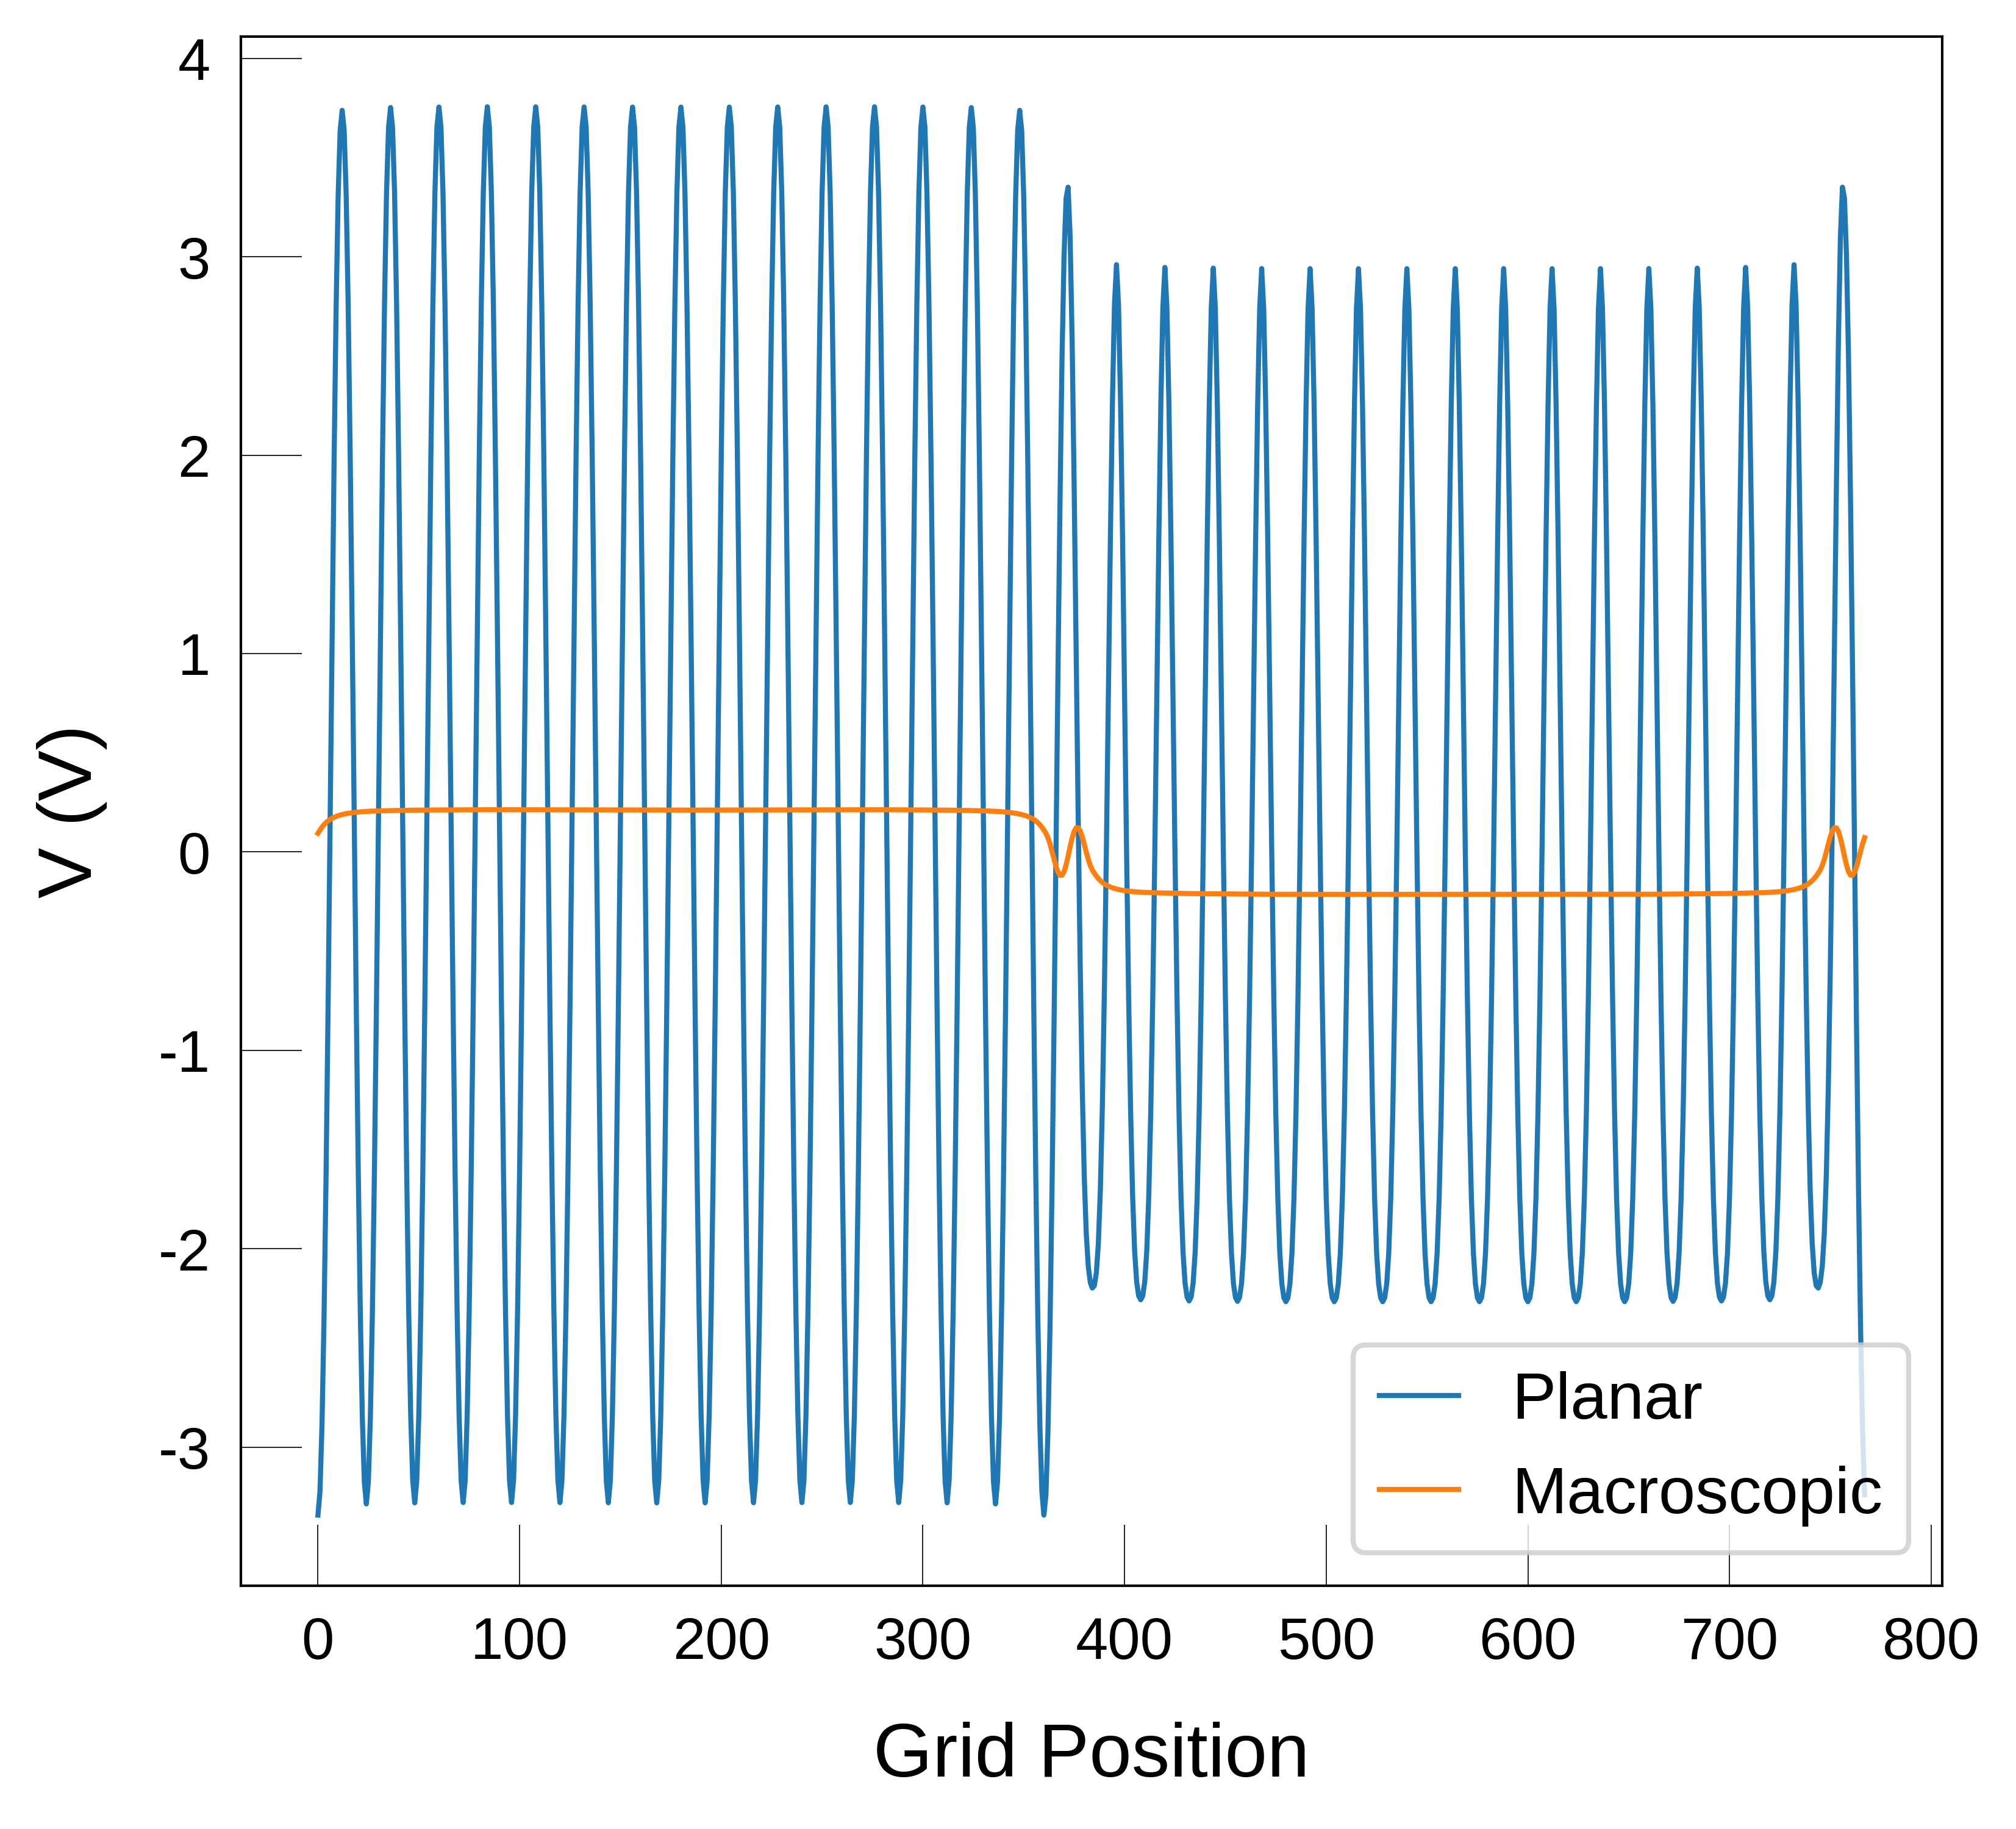

In [15]:
input_file = 'LOCPOT_slab'
lattice_vector = 2.0 # roughly the distance in Angstroms between the repeating units of the slab
output_file = 'planar_average.csv'

# To perform average along z axis, we specify axis="z"
df, fig = md.plot_planar_average(
    input_file=input_file,
    lattice_vector=lattice_vector,
    axis="z",
    output_file=output_file,
)

### Get $\Delta V$

From the macroscopic average, we can find that the value of $V$ at each plateau:

In [18]:
max_mac = df.Macroscopic.max()
min_mac = df.Macroscopic.min()

print("Values of V at the plateaus:", round(min_mac, 2), "V and", round(max_mac, 2), "V")
delta_V = max_mac - min_mac
print("Delta V:", round(delta_V, 2), "V")

Values of V at the plateaus: -0.21 V and 0.21 V
Delta V: 0.43 V


### The offset

Applying the equation from earlier, the VBO is 

In [21]:
VBO = extrema_ZnS[0] - extrema_ZnO[0] + delta_V

print(f"VBO = {VBO:.2f} eV")

VBO = 1.63 eV


## Procedure (ii)

In this procedure we can take into account the fact that the band edge positions are affected by changes to the cell volume. To do this we first calculate the eigenvalues $\epsilon_{VBM}$ at an *average* volume of the two materials.

In [22]:
extrema_ZnO_avg = md.io.get_band_extrema('OUTCAR_ZnO_av')
print("Extrema of ZnO:", extrema_ZnO_avg)
extrema_ZnS_avg = md.io.get_band_extrema('OUTCAR_ZnS_av')
print("Extrema of ZnS:", extrema_ZnS_avg)

Extrema of ZnO: [-2.464, -0.626]
Extrema of ZnS: [4.8288, 10.184]


### The deformation potential

To account for the effect of strain on the band positions we need to know the deformation potential $\alpha$. In this case the values for $\alpha$ of ZnO and ZnS (and many other systems) are available [Phys. Rev. B 73, 245206](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.73.245206).

$\alpha_{ZnO} = 0.48$

$\alpha_{ZnS} = 0.83$

The equation we now use is 

$VBO = (\epsilon_{vbm}^a + \alpha_a \partial \ln V_a )- (\epsilon_{vbm}^b + \alpha_b \partial \ln V_b) + \Delta V$

Here the eigenvalues and offset potential are the same as in procedure (i), but calculated for an average volume cell. We also use the log of the change in volume of each phase multiplied by the deformation potential ($ \alpha_B \partial \ln V_B $).

### The potential alignment

This procedure is the same as for procedure (i), but always using the average volume cell. Actually as we used the average cell in procedure (i), it turns out to be exactly the same, but we can do it again to reinforce.

Reading header information...
Reading 3D data using Pandas...
Average of the potential =  6.488965743335063e-14
Average of the average =  6.496655065764874e-14


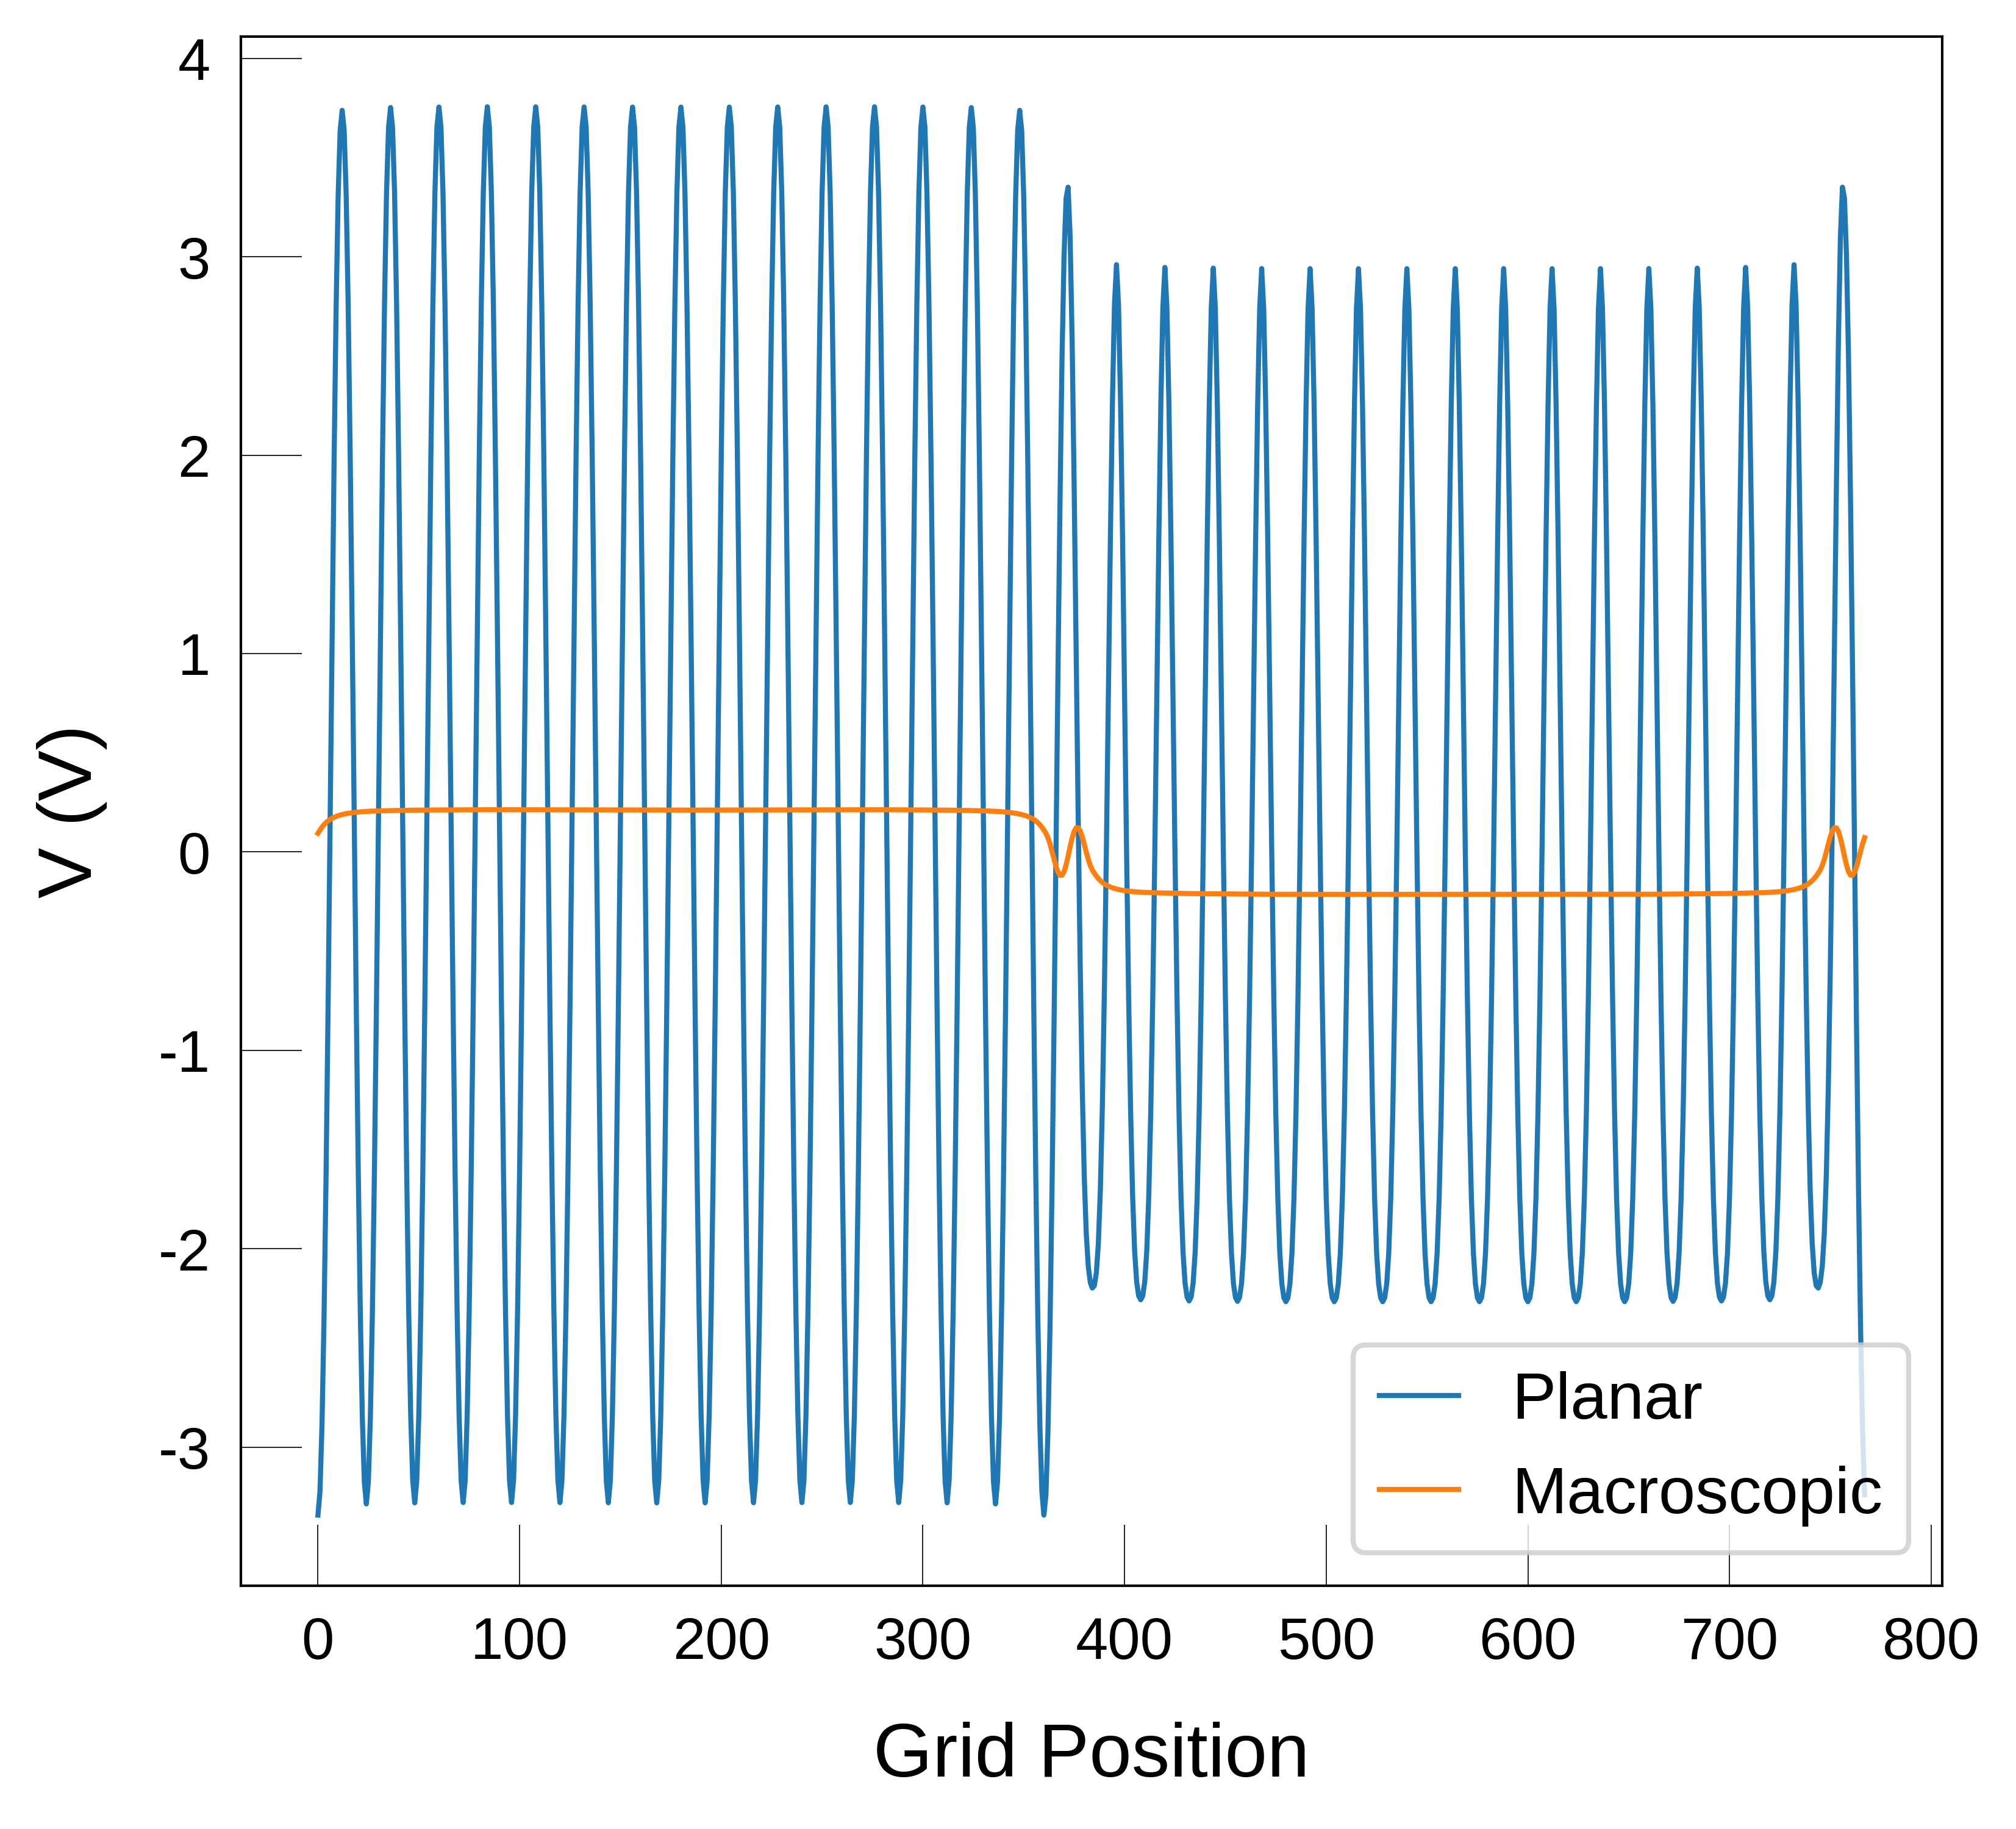

In [11]:
input_file = 'LOCPOT_slab'
lattice_vector = 2.0
output_file = 'planar_average.csv'

df, fig = md.plot_planar_average(
    input_file=input_file,
    lattice_vector=lattice_vector,
    axis="z", output_file=output_file
)

In [23]:
max_mac = df.Macroscopic.max()
min_mac = df.Macroscopic.min()

print("Values of V at the plateaus:", round(min_mac, 2), "V and", round(max_mac, 2), "V")
delta_V = max_mac - min_mac
print("Delta V:", round(delta_V, 2), "V")

Values of V at the plateaus: -0.21 V and 0.21 V
Delta V: 0.43 V


As before the value of $\Delta V$ is 0.43 V.

### Volume change

To get the values of $\partial\ln V = \frac{\Delta V}{V_{av}}$, we compare the average volume to the equilibrium volumes of ZnO and ZnS. 
We can parse the volumes from the `OUTCAR` files using the function `get_lattice_from_outcar` as shown below:

In [79]:
from pymatgen.core.lattice import Lattice

def get_lattice_from_outcar(outcar_filename):
    """Parse lattice from OUTCAR file.
    Returns pymatgen.core.lattice.Lattice object.
    """
    # open file
    with open(outcar_filename, 'r') as f:
        # read lines
        lines = f.readlines()
    # Find first line with string "Lattice vectors:"
    for i, line in enumerate(lines):
        if "Lattice vectors:" in line:
            index_lattice = i
            break
    # Get next 4 lines
    lattice_lines = lines[index_lattice+2:index_lattice+5]
    # Get non-zero lattice vectors
    lattice_vectors = []
    for line in lattice_lines:
        line = line.split("= (")[1].split(")\n")[0]
        lattice_vectors.append([float(x) for x in line.split(",")])
    lattice = Lattice(lattice_vectors)
    return lattice

In [89]:
lattice_ZnO = get_lattice_from_outcar('OUTCAR_ZnO')
lattice_ZnS = get_lattice_from_outcar('OUTCAR_ZnS')
lattice_avg = get_lattice_from_outcar('OUTCAR_ZnS_av')
lattice_avg_ZnO = get_lattice_from_outcar('OUTCAR_ZnO_av') # same as lattice_avg
print(f"Volume of ZnO: {lattice_ZnO.volume:.2f} Angstrom^3")
print(f"Volume of ZnS: {lattice_ZnS.volume:.2f} Angstrom^3")
print(f"Average volume: {lattice_avg.volume:.2f} Angstrom^3")

Volume of ZnO: 47.55 Angstrom^3
Volume of ZnS: 76.88 Angstrom^3
Average volume: 61.04 Angstrom^3


In [90]:
# For ZnO:
dlnVa = (lattice_ZnO.volume - lattice_avg.volume) / lattice_avg.volume
# For ZnS:
dlnVb = (lattice_ZnS.volume - lattice_avg.volume) / lattice_avg.volume

Substituting these values into the equation

$VBO = (\epsilon_{vbm}^a + \alpha_a \partial \ln V_a )- (\epsilon_{vbm}^b + \alpha_b \partial \ln V_b) + \Delta V$

In [91]:
alpha_ZnO = 0.48
alpha_ZnS = 0.83

vbm_ZnO = extrema_ZnO_avg[0]
vbm_ZnS = extrema_ZnS_avg[0]

VBO_natural = (vbm_ZnO + alpha_ZnO * dlnVa) - (vbm_ZnS + alpha_ZnS * dlnVb) + delta_V

In [92]:
print('Natural offset: ' + str(VBO_natural) + ' eV')

Natural offset: -7.187803887281117 eV
